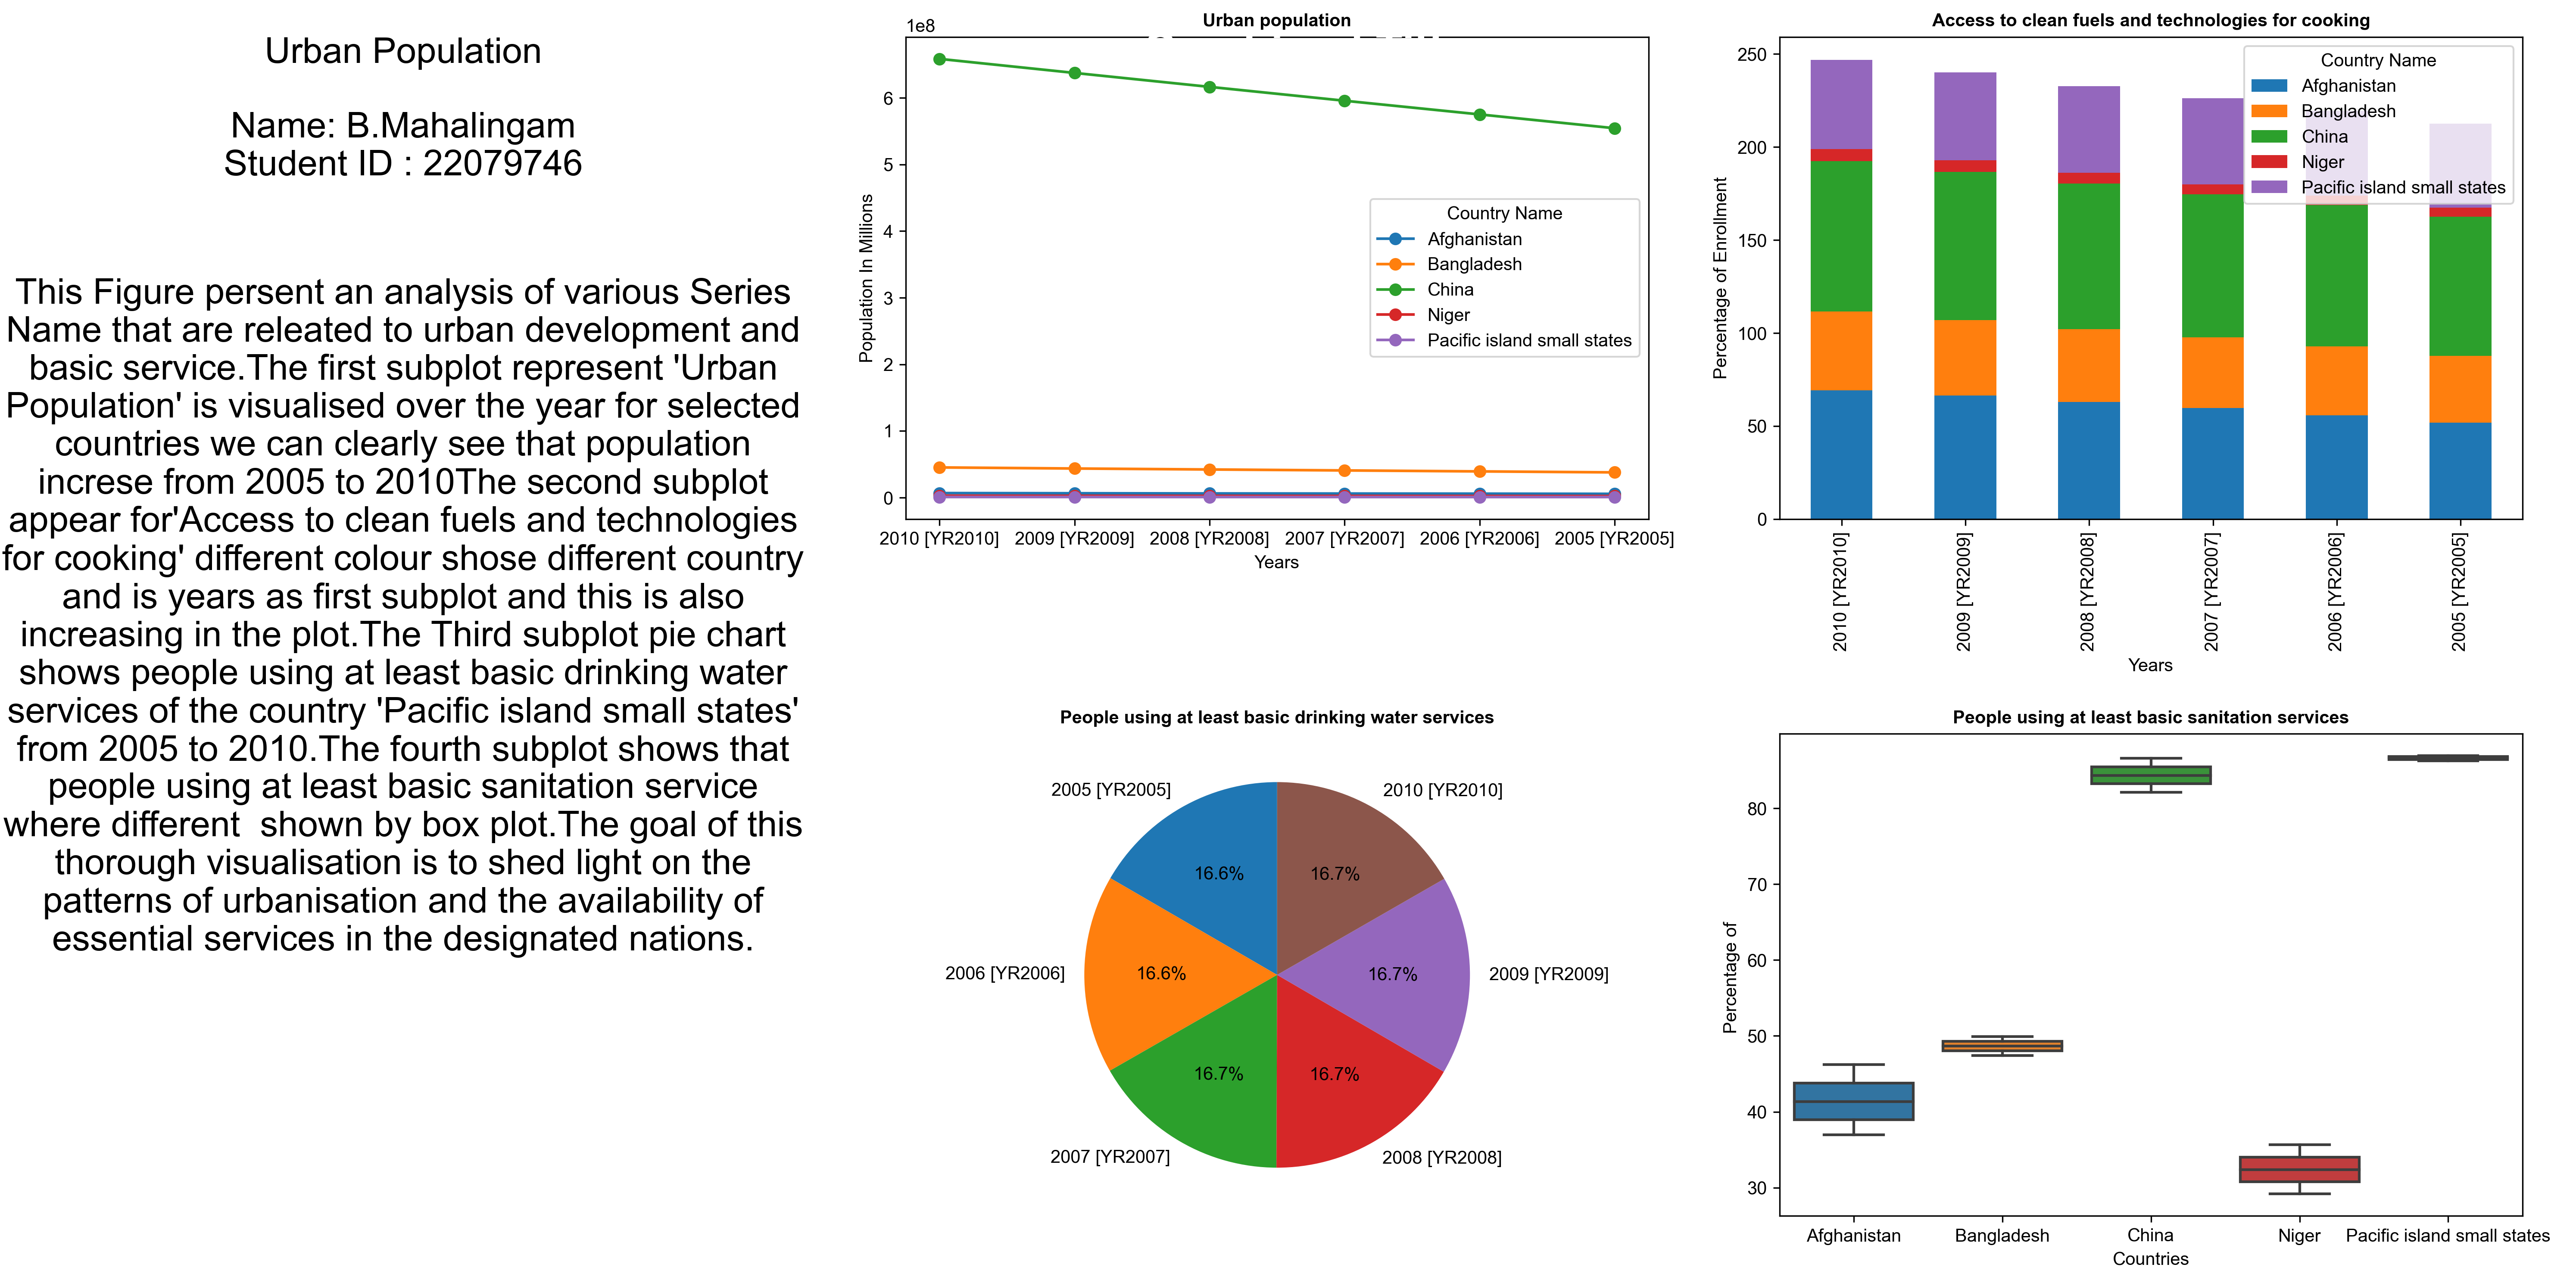

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gs
def read_data(csv_file):
    """
    

    Parameters
    ----------
    csv_file : The file path to the CSV file containing the data to be read

    Returns
    -------
    df : The DataFrame containing the data read 
    from the csv file
    """
    df = pd.read_csv("C:/Users/rajab/OneDrive/Desktop/Assignments/Assignment infograpics/World data.csv", encoding='latin1')
    df = df.loc[:, ~df.columns.isin(["Country Code","Series Code"])]
    df = df.dropna(axis=1, how='all')
    df.to_excel('data.xlsx', index=True)
    
    return df
df = read_data("C:/Users/rajab/OneDrive/Desktop/Assignments/Assignment infograpics/World data.csv")

def series_name(A,B,C,D):
    '''
    

    Parameters
    ----------
    A B C D : series names to filter the DataFrame

    Returns
    -------
    series : The filtered DataFrame contain data for the specified series names

    '''
    series = df[df["Series Name"].isin([A,B,C,D])]
    
    return series
A = "Urban population"
B = "Access to clean fuels and technologies for cooking, urban (% of urban population)"
C = "People using at least basic drinking water services, urban (% of urban population)"
D = "People using at least basic sanitation services, urban (% of urban population)"

s = series_name(A,B,C,D)

def countries(countries):
    '''
    

    Parameters
    ----------
    countries : list of the country names and the filter the DataFrame

    Returns
    -------
    selec_coun : The filtered DataFrame contain data for the selected countries

    '''
    selec_coun = s[s["Country Name"].isin(countries)]
    selec_coun = selec_coun.dropna(axis = 1)
    
    return selec_coun

countries_list = ["Afghanistan","Bangladesh","China","Niger","Pacific island small states"]

selec_coun = countries(countries_list)

stats_desc = selec_coun.groupby(["Country Name", "Series Name"])

def ind(indicator, start_year=None, end_year=None): 
    '''
    

    Parameters
    ----------
    indicator : Extracted data for indictor
    start_year : Start year of the data range
    end_year : End year of the data range

    Returns
    -------
    ind_coun :  DataFrame for the specified indicator and year range

    '''
    ind_coun = selec_coun[selec_coun["Series Name"] == indicator]
    ind_coun = ind_coun.set_index("Country Name", drop=True)
    
    # Check if there is data after dropping "Series Name"
    if not ind_coun.empty:
        ind_coun = ind_coun.transpose().drop("Series Name", errors='ignore')  # Updated to handle errors
        ind_coun[countries_list] = ind_coun[countries_list].apply(pd.to_numeric, errors='coerce', axis=1)
    
        # Filter data based on the specified year range
        if start_year is not None and end_year is not None:
            ind_coun = ind_coun.loc[start_year:end_year]
    
    return ind_coun

# Selecting indicator and countries
ub_fuels_technologies = ind("Access to clean fuels and technologies for cooking, urban (% of urban population)", start_year='2010 [YR2010]', end_year='2005 [YR2005]')

ub_Population = ind("Urban population",start_year='2010 [YR2010]', end_year='2005 [YR2005]')
ub_fuels_technologies = ind("Access to clean fuels and technologies for cooking, urban (% of urban population)",start_year= '2010 [YR2010]', end_year='2005 [YR2005]')
ub_basic_drinking_water_services = ind("People using at least basic drinking water services, urban (% of urban population)",start_year='2010 [YR2010]', end_year='2005 [YR2005]')
ub_basic_sanitation_services = ind("People using at least basic sanitation services, urban (% of urban population)", start_year='2010 [YR2010]', end_year='2005 [YR2005]')

#pie chart data
selected_country = "Pacific island small states"
years_to_select = ['2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]']

# Filter the data for the specified years
data_for_country = ub_basic_drinking_water_services.T.loc[selected_country, years_to_select].abs().dropna()


# Create subplots using gridspec
fig = plt.figure(figsize=(20, 15), dpi=300)
gs = gs.GridSpec(nrows=3, ncols=3, figure=fig)

#This is line plot
ax1 = fig.add_subplot(gs[0, 1])
ub_Population.plot(ax=ax1, marker='o', linestyle='-')
ax1.set_title('Urban population', size=10, fontweight='bold')
ax1.set_xlabel('Years')
ax1.set_ylabel('Population In Millions')
#This is bar plot
ax2 = fig.add_subplot(gs[0, 2])
ub_fuels_technologies.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Access to clean fuels and technologies for cooking', size=10, fontweight='bold')
ax2.set_xlabel('Years')
ax2.set_ylabel('Percentage of Enrollment')
#This is pie chart
ax3 = fig.add_subplot(gs[1, 1])
selected_country = "Pacific island small states"
years_to_select = ['2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]']
ax3.pie(data_for_country, labels=data_for_country.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('People using at least basic drinking water services', size=10, fontweight='bold')
#this is box plot
ax4 = fig.add_subplot(gs[1, 2])
sns.boxplot(data = ub_basic_sanitation_services, ax = ax4)
ax4.set_title('People using at least basic sanitation services', size=10, fontweight='bold')
ax4.set_xlabel('Countries')
ax4.set_ylabel('Percentage of ')

fig.tight_layout()

title_text = 'Urban Population'
namenid = 'Name: B.Mahalingam\nStudent ID : 22079746'

# in this i combined the title and nameid
combined_text = f'{title_text}\n\n{namenid}'


paragraph = (
   "This Figure persent an analysis of various Series Name that are releated to urban development and basic service."
   "The first subplot represent 'Urban Population' is visualised over the year for selected countries we can clearly see that population increse from 2005 to 2010"
   "The second subplot appear for'Access to clean fuels and technologies for cooking' different colour shose different country and is years as first subplot and this is also increasing in the plot." 
   "The Third subplot pie chart shows people using at least basic drinking water services of the country 'Pacific island small states' from 2005 to 2010."
   "The fourth subplot shows that people using at least basic sanitation service where different  shown by box plot."
   "The goal of this thorough visualisation is to shed light on the patterns of urbanisation and the availability of essential services in the designated nations."
)

ax5 = fig.add_subplot(gs[0,0])
ax5.axis('off')  # Turn off axes, ticks, and spines
ax5.set_facecolor('lightgreen')  # Background color
ax5.text(0.5, 1.0, combined_text, fontsize=20, ha='center', va='top')
height_paragraph = 0.85
ax5.text(0.5, 0.5, paragraph, ha='center', va='top', fontsize=20, wrap=True, color='black')

sns.set_style("darkgrid")


# Set the new combined title at the top
fig.suptitle('Combined Title', fontsize=25, color='white', weight='bold', va='top')
plt.show()